Contexte : suite à l'épidémie du coronavirus survenue en 2020, nous souhaitons étudier l'incidence du covid19 dans le monde à partir de données correspondant à la période du 01-12-2019 au 23-04-2020. Nous allons concentrer notre étude sur la France.


## 1. Exploration des données et réindexation du data set

In [1]:
# Importer la bibliothèque Pandas
import pandas as pd

In [2]:
# Charger le fichier "covid-19" et afficher les cinq premières lignes
data = pd.read_csv("covid-19.csv")
data = data.iloc[:,1:]
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-23,23,4,2020,933,264,Belgium,BE,BEL,11422068.0,Europe
1,2020-04-22,22,4,2020,973,170,Belgium,BE,BEL,11422068.0,Europe
2,2020-04-21,21,4,2020,1487,145,Belgium,BE,BEL,11422068.0,Europe
3,2020-04-20,20,4,2020,1313,230,Belgium,BE,BEL,11422068.0,Europe
4,2020-04-19,19,4,2020,1045,290,Belgium,BE,BEL,11422068.0,Europe


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  690 non-null    object 
 1   day                      690 non-null    int64  
 2   month                    690 non-null    int64  
 3   year                     690 non-null    int64  
 4   cases                    690 non-null    int64  
 5   deaths                   690 non-null    int64  
 6   countriesAndTerritories  690 non-null    object 
 7   geoId                    690 non-null    object 
 8   countryterritoryCode     690 non-null    object 
 9   popData2018              690 non-null    float64
 10  continentExp             690 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 59.4+ KB


Le dataframe contient 690 enregistrements et 11 variables dont une seule variables catégorielle "continentExp".

In [4]:
mask = data["geoId"]=="FR"
fr_data = data[mask]
fr_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
115,2020-04-23,23,4,2020,1827,544,France,FR,FRA,66987244.0,Europe
116,2020-04-22,22,4,2020,2667,531,France,FR,FRA,66987244.0,Europe
117,2020-04-21,21,4,2020,2051,547,France,FR,FRA,66987244.0,Europe
118,2020-04-20,20,4,2020,785,395,France,FR,FRA,66987244.0,Europe
119,2020-04-19,19,4,2020,2569,642,France,FR,FRA,66987244.0,Europe


In [5]:
# ci-dessus index commence à partir de 115 et non de 0, donc on va faire un "reset index"
fr_data.reset_index()

,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,115,2020-04-23,23,4,2020,1827,544,France,FR,FRA,66987244.0,Europe
1,116,2020-04-22,22,4,2020,2667,531,France,FR,FRA,66987244.0,Europe
2,117,2020-04-21,21,4,2020,2051,547,France,FR,FRA,66987244.0,Europe
3,118,2020-04-20,20,4,2020,785,395,France,FR,FRA,66987244.0,Europe
4,119,2020-04-19,19,4,2020,2569,642,France,FR,FRA,66987244.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
110,225,2020-01-04,4,1,2020,0,0,France,FR,FRA,66987244.0,Europe
111,226,2020-01-03,3,1,2020,0,0,France,FR,FRA,66987244.0,Europe
112,227,2020-01-02,2,1,2020,0,0,France,FR,FRA,66987244.0,Europe
113,228,2020-01-01,1,1,2020,0,0,France,FR,FRA,66987244.0,Europe


In [6]:
# ci-dessus, on observe une double indexation : celle qui commence par "0"  et celle qui commence par 575". Or, nous avons besoin que d'un seul index le "0", donc on fait "drop=True" pour enlever la colonne en double
fr_data = fr_data.reset_index(drop = True)
fr_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-23,23,4,2020,1827,544,France,FR,FRA,66987244.0,Europe
1,2020-04-22,22,4,2020,2667,531,France,FR,FRA,66987244.0,Europe
2,2020-04-21,21,4,2020,2051,547,France,FR,FRA,66987244.0,Europe
3,2020-04-20,20,4,2020,785,395,France,FR,FRA,66987244.0,Europe
4,2020-04-19,19,4,2020,2569,642,France,FR,FRA,66987244.0,Europe


Comme nous souhaitons connaitre le point d'inflexion de la courbe de la pandémie, nous allons étudier le "growth_ratio" (ou taux de croissance), c'est à dire le rapport entre le nombre de nouveaux cas de covid du jour sur le nombre total des cas des jours précédents. Pour cela, nous allons ajouter des colonnes supplémentaires à la suite du dataset, pour stocker les résultats de calculs. Notre hypothèse est la suivante : si le growth_ratio est > 1, la courb croit de manière exponentielle, par contre, si le growth_ratio est < 1, la courbe aura atteint le point d'inflexion.

## 2. Ajout des colonnes "cumulated_cases", "new_cases" et "growth_ratio"

In [7]:
# créer une colonne pour connaitre le nombre de cas de covid-19 cumulés, une colonne supplémentaire nommée "cumulated_cases" apparait à la fin du dataframe et qui démarre à 0
fr_data["cumulated_cases"] = 0
fr_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,1827,544,France,FR,FRA,66987244.0,Europe,0
1,2020-04-22,22,4,2020,2667,531,France,FR,FRA,66987244.0,Europe,0
2,2020-04-21,21,4,2020,2051,547,France,FR,FRA,66987244.0,Europe,0
3,2020-04-20,20,4,2020,785,395,France,FR,FRA,66987244.0,Europe,0
4,2020-04-19,19,4,2020,2569,642,France,FR,FRA,66987244.0,Europe,0


In [8]:
# Comme on doit calculer le dernier index du dataframe, il faut connaitre la longueur du dataframe us_data :
len(fr_data)

115

In [9]:
# us_data contient 115 lignes ou observations
total_rows = len(fr_data)
print(total_rows)

115


In [10]:
# On vérifie le nombre d'observations de us_data en fin de dataframe, index partant de 0 à 114
fr_data.tail()  

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
110,2020-01-04,4,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0
111,2020-01-03,3,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0
112,2020-01-02,2,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0
113,2020-01-01,1,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0
114,2019-12-31,31,12,2019,0,0,France,FR,FRA,66987244.0,Europe,0


In [11]:
# Pour connaitre le nombre de cas cumulé chaque jour, additionner le jour précédent avec le jour J
for i in range(total_rows -2, -1, -1) : 
    fr_data.loc[i,"cumulated_cases"] = fr_data.loc [i,"cases"] + fr_data.loc[i+1, "cumulated_cases"]

In [12]:
fr_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,1827,544,France,FR,FRA,66987244.0,Europe,119151
1,2020-04-22,22,4,2020,2667,531,France,FR,FRA,66987244.0,Europe,117324
2,2020-04-21,21,4,2020,2051,547,France,FR,FRA,66987244.0,Europe,114657
3,2020-04-20,20,4,2020,785,395,France,FR,FRA,66987244.0,Europe,112606
4,2020-04-19,19,4,2020,2569,642,France,FR,FRA,66987244.0,Europe,111821


In [13]:
# Pour connaitre chaque jour, le nombre de nouveaux cas, on crée une nouvelle colonne "new_cases"
fr_data["new_cases"]= 0
fr_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases
0,2020-04-23,23,4,2020,1827,544,France,FR,FRA,66987244.0,Europe,119151,0
1,2020-04-22,22,4,2020,2667,531,France,FR,FRA,66987244.0,Europe,117324,0
2,2020-04-21,21,4,2020,2051,547,France,FR,FRA,66987244.0,Europe,114657,0
3,2020-04-20,20,4,2020,785,395,France,FR,FRA,66987244.0,Europe,112606,0
4,2020-04-19,19,4,2020,2569,642,France,FR,FRA,66987244.0,Europe,111821,0


In [14]:
# Soustraction cas cumulé du jour J au cas cumulé du jour précédent: 
for i in range(total_rows -2, -1, -1) : 
    fr_data.loc[i, "new_cases"] = fr_data.loc[i, "cumulated_cases"] - fr_data.loc[i+1, "cumulated_cases"]

In [15]:
fr_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases
0,2020-04-23,23,4,2020,1827,544,France,FR,FRA,66987244.0,Europe,119151,1827
1,2020-04-22,22,4,2020,2667,531,France,FR,FRA,66987244.0,Europe,117324,2667
2,2020-04-21,21,4,2020,2051,547,France,FR,FRA,66987244.0,Europe,114657,2051
3,2020-04-20,20,4,2020,785,395,France,FR,FRA,66987244.0,Europe,112606,785
4,2020-04-19,19,4,2020,2569,642,France,FR,FRA,66987244.0,Europe,111821,2569


In [16]:
# Pour connaitre le rapport entre le nombre de nouveaux cas par jour sur le nombre total de cas des jours précédents
fr_data["growth_ratio"] = 0
for i in range(total_rows -2, -1, -1):
    fr_data.loc[i,"growth_ratio"] = fr_data.loc[i, "new_cases"] / fr_data.loc[i+1, "new_cases"]

fr_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
0,2020-04-23,23,4,2020,1827,544,France,FR,FRA,66987244.0,Europe,119151,1827,0.685039
1,2020-04-22,22,4,2020,2667,531,France,FR,FRA,66987244.0,Europe,117324,2667,1.300341
2,2020-04-21,21,4,2020,2051,547,France,FR,FRA,66987244.0,Europe,114657,2051,2.612739
3,2020-04-20,20,4,2020,785,395,France,FR,FRA,66987244.0,Europe,112606,785,0.305566
4,2020-04-19,19,4,2020,2569,642,France,FR,FRA,66987244.0,Europe,111821,2569,6.343210


In [17]:
mask = fr_data["growth_ratio"]>=1
mask.describe()

count       115
unique        2
top       False
freq         73
Name: growth_ratio, dtype: object

En France, sur les 115 cas de covid-19 enregistrés, il y a 73 cas où le "growth_ratio" est >1, 2 cas où le "growth_ratio" est >=1.

## 3. Data visualisation 

La data visualisation permet de mieux mettre en évidence le point d'inflexion.

<AxesSubplot:xlabel='dateRep'>

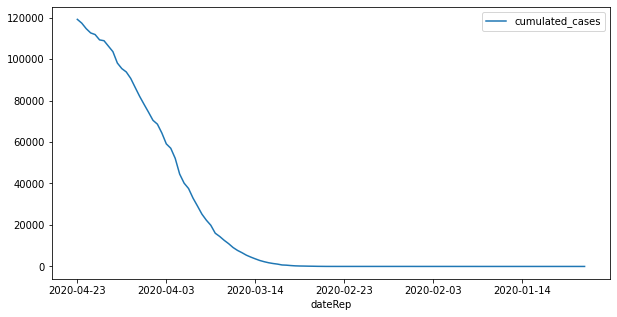

In [18]:
fr_data.plot.line(x="dateRep", y="cumulated_cases", figsize=(10,5))

In [19]:
# la courbe ci-dessus est décroissante car les données sont inversées (des cas les plus récents au plus anciens), donc on va trier dans l'ordre croissant avec "sort_values"
fr_data = fr_data.sort_values("dateRep")
fr_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
114,2019-12-31,31,12,2019,0,0,France,FR,FRA,66987244.0,Europe,0,0,0.0
113,2020-01-01,1,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0,0,NaN
112,2020-01-02,2,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0,0,NaN
111,2020-01-03,3,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0,0,NaN
110,2020-01-04,4,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0,0,NaN


<AxesSubplot:xlabel='dateRep'>

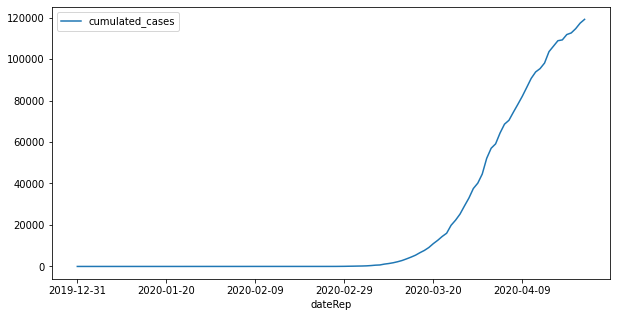

In [20]:
fr_data.plot.line(x="dateRep", y="cumulated_cases",figsize=(10,5))

<AxesSubplot:xlabel='dateRep'>

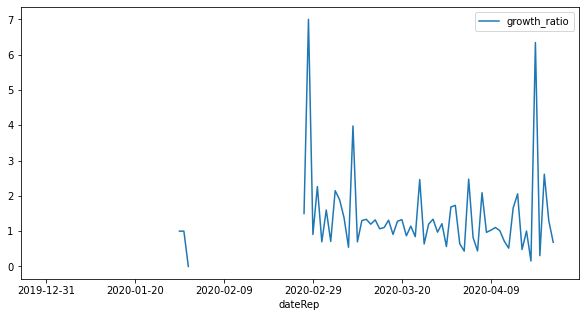

In [21]:
fr_data.plot.line(x="dateRep", y="growth_ratio", figsize=(10,5))

Observation : Les premiers cas de covid-19 déclarés fin janvier 2020 ne sont pas significatives.Le graphe ci-dessus ne montre des valeurs significatives qu'à partir du 29-02-20. Nous allons tracer le graphique à partir du 29-02-2020.

<AxesSubplot:xlabel='dateRep'>

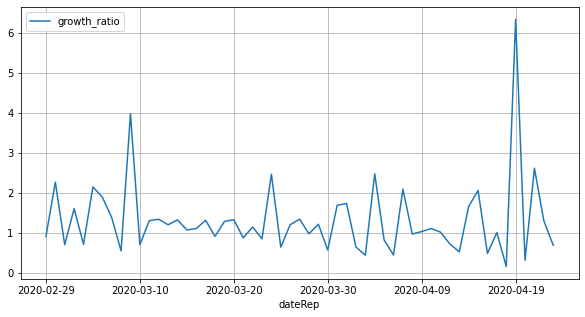

In [22]:
# Graphe à partir de Février 2020
mask = fr_data["dateRep"] >= "2020-02-29"
fr_data[mask].plot.line(x="dateRep", y="growth_ratio", figsize=(10,5), grid=True)

Observation : globalement,le growth-ratio est supérieur à 1, avec 2 pics importants pour un growth_ratio supérieur à 3.0 vers le 08-03-2020 et le 19-04-2020.

## 4. Conclusion

Le "growth_ratio" étant supérieur à 1, nous pouvons dire que l'épidémie du covid-19 croit de manière exponentielle, car nous sommes encore en début d'épidémie et le point d'inflexion n'est pas encore atteint, comme indiqué en image ci dessous : 


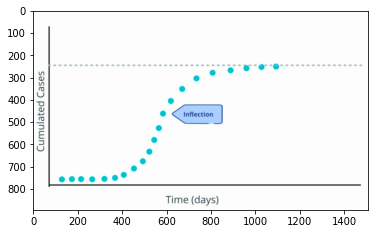

In [23]:
# Import de la bibliothèque matplotlib pour visualiser les graphiques ou images
import matplotlib.pyplot as plt
img=plt.imread('image_courbe_covid19.png')
plt.imshow(img) 

Nous allons enregistrer les résultats des calculs dans un fichier Excel.

In [24]:
fr_data.to_excel("fr_data.xlsx")